In [1]:
import sys
sys.path.append("..")
sys.path.append("../src")

In [2]:
import utils

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [4]:
def clear_axis(fig, ax):
    #sns.despine(fig)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    plt.axis("off")
    plt.tight_layout()

In [5]:
params = utils.read_parameter_file_from_path("/Users/c/gits/TEQUAL/experiments/DAE-Figure/params.yaml")

In [14]:
result_path = "/Users/c/gits/TEQUAL/data/XYC/embeddings/DAE-Figure/models.dae"
config_path = "/Users/c/gits/TEQUAL/experiments/DAE-Figure/configs/"
results = list()
configs = list()
for idx,file in enumerate(utils.list_dir(result_path, order="id", full_path=True)):
    results.append(utils.load_pickle_from_file(file))
    configs.append(utils.load_config(idx, config_path))
for r in results:
    r["embedding"] = pd.DataFrame(r["embedding"], columns=["x","y"]).drop_duplicates()

In [15]:
utils.list_dir(result_path, full_path=True)

['/Users/c/gits/TEQUAL/data/XYC/embeddings/DAE-Figure/models.dae/embedding_0',
 '/Users/c/gits/TEQUAL/data/XYC/embeddings/DAE-Figure/models.dae/embedding_1',
 '/Users/c/gits/TEQUAL/data/XYC/embeddings/DAE-Figure/models.dae/embedding_2',
 '/Users/c/gits/TEQUAL/data/XYC/embeddings/DAE-Figure/models.dae/embedding_3',
 '/Users/c/gits/TEQUAL/data/XYC/embeddings/DAE-Figure/models.dae/embedding_4',
 '/Users/c/gits/TEQUAL/data/XYC/embeddings/DAE-Figure/models.dae/embedding_5',
 '/Users/c/gits/TEQUAL/data/XYC/embeddings/DAE-Figure/models.dae/embedding_6',
 '/Users/c/gits/TEQUAL/data/XYC/embeddings/DAE-Figure/models.dae/embedding_7',
 '/Users/c/gits/TEQUAL/data/XYC/embeddings/DAE-Figure/models.dae/embedding_8',
 '/Users/c/gits/TEQUAL/data/XYC/embeddings/DAE-Figure/models.dae/embedding_9',
 '/Users/c/gits/TEQUAL/data/XYC/embeddings/DAE-Figure/models.dae/embedding_10',
 '/Users/c/gits/TEQUAL/data/XYC/embeddings/DAE-Figure/models.dae/embedding_11']

In [16]:
figure_path = "../../../ICML2024_EmbedEQ/images/DAE"
utils.ensure_exists(figure_path)

<Axes: xlabel='x', ylabel='y'>

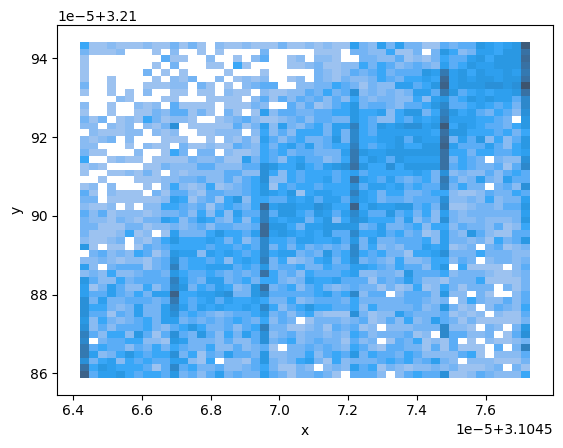

In [23]:
sns.histplot(data=r["embedding"], x="x", y="y", bins=(50,50))

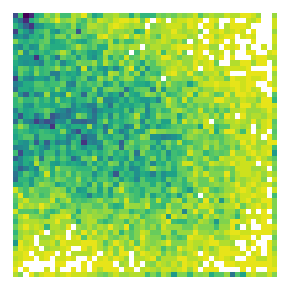

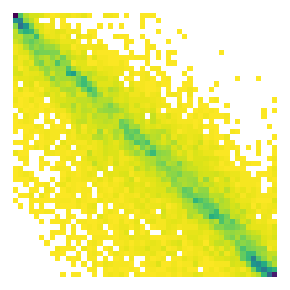

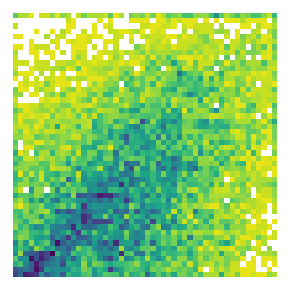

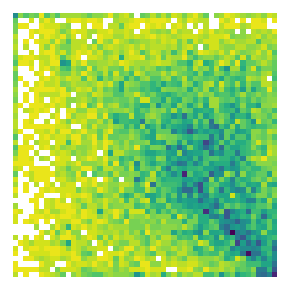

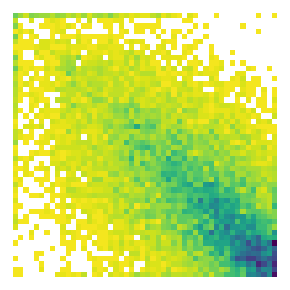

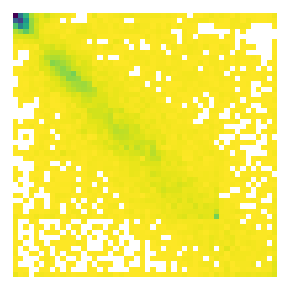

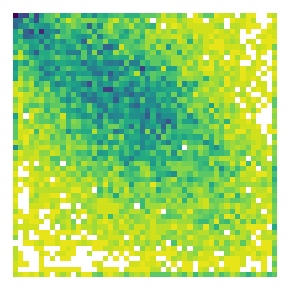

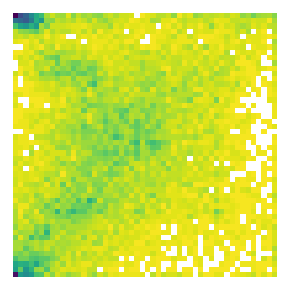

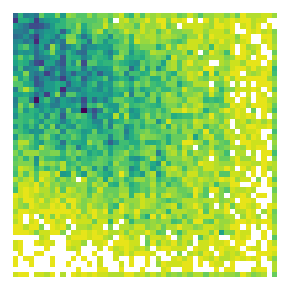

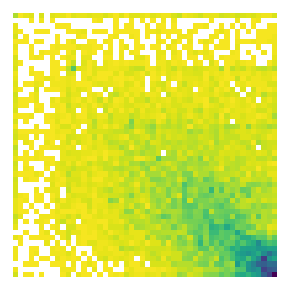

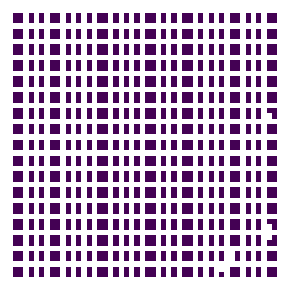

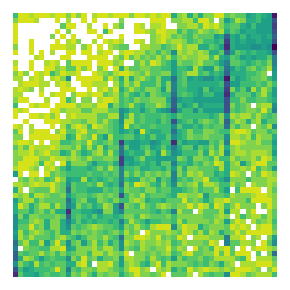

In [36]:
for r,c in zip(results,configs):
    fig, ax = plt.subplots(1,1,figsize=(3,3))
    sns.histplot(data=r["embedding"], x="x", y="y", bins=(50,50), cmap="viridis_r")
    #sns.scatterplot(data=r["embedding"], x="x", y="y", ax=ax, s=2.5, color="k")
    xmax, ymax = r["embedding"]["x"].max(), r["embedding"]["y"].max()
    xmin, ymin = r["embedding"]["x"].min(), r["embedding"]["y"].min()
    alpha = c["model_params"]["alpha"]
    lr = c["trainer_params"]["lr"]
    ax.set_xlim(xmin - 0.01 * (xmax-xmin), xmax + 0.01 * (xmax-xmin))
    ax.set_ylim(ymin - 0.01 * (ymax-ymin), ymax + 0.01 * (ymax-ymin))
    clear_axis(fig, ax)
    plt.savefig(f"{figure_path}/alpha-{alpha}_lr-{lr}.pdf", bbox_inches="tight", transparent=True)
    #plt.close()

In [37]:
from matplotlib import colors

In [39]:
colors.rgb2hex((0.89, 0.102, 0.109)) # red from our IPE stylesheet

'#e31a1c'